# **About Datasets**

ChatGPT has been a major talk in the tech world. The tweets about chatgpt were gathered for a month and then the sentiment analysis was made using Natural Language Processing.

**Features**
*   Tweets	: text of tweet data
*   abels	: class of sentiment (good, bad, neutral)


# **Import Library & Datasets**

---

In [ ]:
!pip install --upgrade nltk

In [ ]:
!pip install lightgbm xgboost scipy

In [ ]:
!pip install imbalanced-learn scikit-learn

In [ ]:
!pip install optuna

In [ ]:
!pip install keras-tuner

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
!pip install tabulate

In [ ]:
!pip install wordcloud

In [43]:
pip install --upgrade tensorflow keras

In [1]:
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
import seaborn as sns
import re
import tensorflow as tf
import matplotlib.pyplot as plt
import string
import keras.backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras import models
from keras import layers
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
df=pd.read_csv('file.csv')

In [3]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [4]:
jumlah_baris, jumlah_kolom = df.shape

print(f"Jumlah baris: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah baris: 219294
Jumlah kolom: 3


# **Pre-Processing**

---

In [5]:
df = df.drop([df.columns[0]], axis=1)
df.values[:5].tolist()

[['ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI',
  'neutral'],
 ['Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr',
  'good'],
 ['ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\\n\\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34',
  'neutral'],
 ['THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71',
  'good'],
 ['As of 2 minutes ago, @OpenAI released their new ChatGPT. \\n\\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1',
  'bad']]

In [6]:
df.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


**Word Cloud data,  sebelum cleaning**

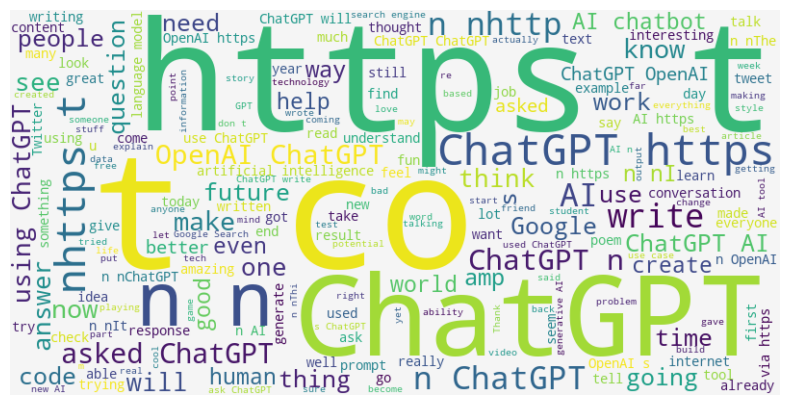

In [8]:
from wordcloud import WordCloud

text_df = df['tweets'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='#F5F5F5').generate(text_df)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
df["labels"].value_counts()

labels
bad        107796
good        56011
neutral     55487
Name: count, dtype: int64

**Data Cleaning**

## **CaseFolding**

In [7]:
def casefolding(text):
    # Hapus URL
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
    # Hapus \n
    text = re.sub(r'\\n', ' ', text)
    # Hapus hashtag dan mention
    text = re.sub(r"\s*#\S+", "", text)
    text = re.sub(r"\s*@\S+", "", text)
    # Hapus karakter non-alfabet dan angka, serta ubah menjadi lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Hapus emoji
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Hapus spasi ekstra
    text = text.strip()
    return text

In [8]:
# membandingkan sebelum dan sesudah case folding

raw_sample = df['tweets'].iloc[14]
case_folding = casefolding(raw_sample)

print('Raw data\t : ', raw_sample)
print('casfolding\t :', case_folding)

Raw data	 :  OpenAI ChatGPT: Optimizing Language Models for Dialogue https://t.co/nq1hJT5S5c \n2
casfolding	 : openai chatgpt optimizing language models for dialogue


## **Filtering (Stopword Removal)**

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_eng = stopwords.words('english')

In [11]:
# membuat fungsi stopword removal

def remove_stop_word(text):
    clean_words = []
    text = text.split()
    for word in text :
        if word not in stopwords_eng:
            clean_words.append(word)
    return " ".join(clean_words)

In [12]:
raw_sample = df['tweets'].iloc[14]
case_folding = casefolding(raw_sample)
stopwords_removal = remove_stop_word(case_folding)

print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding)
print('Stopword Removal \t\t', stopwords_removal)

Raw Data 		 : OpenAI ChatGPT: Optimizing Language Models for Dialogue https://t.co/nq1hJT5S5c \n2
Case Folding 		 : openai chatgpt optimizing language models for dialogue
Stopword Removal 		 openai chatgpt optimizing language models dialogue


## **Preprocessing Pipeline**

In [13]:
def text_preprocessing_process(text):
    text = casefolding(text)
    text = remove_stop_word(text)
    return text

In [14]:
%%time
df['clean_teks']= df['tweets'].apply(text_preprocessing_process)
df

CPU times: total: 4.53 s
Wall time: 14.1 s


,tweets,labels,clean_teks
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,chatgpt optimizing language models dialogue
1,"Try talking with ChatGPT, our new AI system wh...",good,try talking chatgpt new ai system optimized di...
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,chatgpt optimizing language models dialogue tr...
3,"THRILLED to share that ChatGPT, our new model ...",good,thrilled share chatgpt new model optimized dia...
4,"As of 2 minutes ago, @OpenAI released their ne...",bad,minutes ago released new chatgpt use right
...,...,...,...
219289,Other Software Projects Are Now Trying to Repl...,bad,software projects trying replicate chatgpt
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good,asked write joke seos delivered seo make resol...
219291,chatgpt is being disassembled until it can onl...,bad,chatgpt disassembled dissemble
219292,2023 predictions by #chatGPT. Nothing really s...,bad,predictions nothing really specific trends pas...


In [ ]:
# Menyimpan DataFrame ke file CSV
df.to_csv('cleaned_textsFix.csv', index=False)

## **Bagian lain preprocessing**

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [16]:

tokenized_tweet = df['clean_teks'].apply(lambda x: word_tokenize(x))
tokenized_tweet.head()

0    [chatgpt, optimizing, language, models, dialogue]
1    [try, talking, chatgpt, new, ai, system, optim...
2    [chatgpt, optimizing, language, models, dialog...
3    [thrilled, share, chatgpt, new, model, optimiz...
4    [minutes, ago, released, new, chatgpt, use, ri...
Name: clean_teks, dtype: object

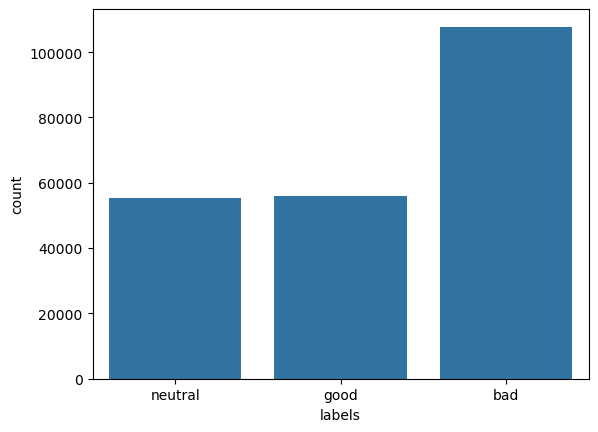

In [20]:
tweets_majority=sns.countplot(data=df, x='labels')
plt.show()
tweets_majority_fig = tweets_majority.get_figure()
tweets_majority_fig.savefig('Images/Majority of tweets.png')

In [17]:
"""### Lemmatization"""

lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
tokenized_tweet.head()

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_teks'] = tokenized_tweet
df.head()

,tweets,labels,clean_teks
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,chatgpt optimizing language model dialogue
1,"Try talking with ChatGPT, our new AI system wh...",good,try talking chatgpt new ai system optimized di...
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,chatgpt optimizing language model dialogue tre...
3,"THRILLED to share that ChatGPT, our new model ...",good,thrilled share chatgpt new model optimized dia...
4,"As of 2 minutes ago, @OpenAI released their ne...",bad,minute ago released new chatgpt use right


# **Bagian Yang Lain**

**Word Cloud data, setelah cleaning**

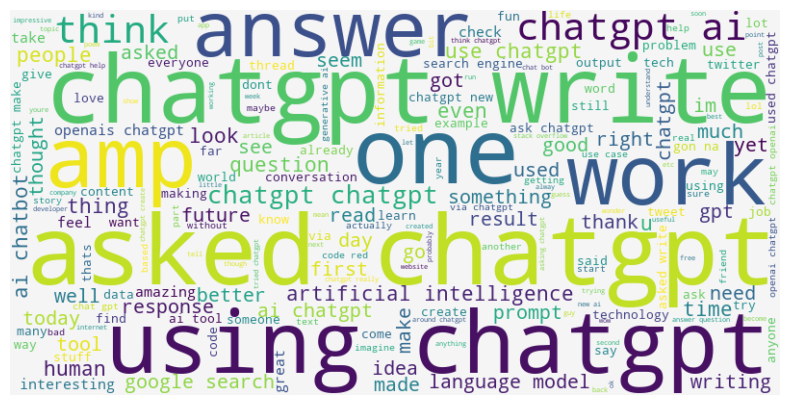

In [22]:
text_df = df['clean_teks'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='#F5F5F5').generate(text_df)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Splitting Data**

---

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df.clean_teks, df.labels, test_size=0.2, random_state=42)
print(f'# training data : {x_train.shape[0]}')
print(f'# testing data : {x_test.shape[0]}')

# training data : 175435
# testing data : 43859


## **Gnerating Training and Testing Data**

In [19]:
training_data=pd.DataFrame({'clean_teks':x_train, 'labels':y_train[:]})
testing_data=pd.DataFrame({'clean_teks':x_test, 'labels':y_test[:]})
training_data.to_csv('CG/training_data.csv')
testing_data.to_csv('CG/testing_data.csv')

# **Teks Procesing**

In [20]:
print(type(x_train))
print(type(x_train.iloc[0]))  # Mengecek tipe data dari elemen pertama

<class 'pandas.core.series.Series'>
<class 'str'>


In [21]:
num_of_words = 32000
max_num_of_words = 50 # in sequence
num_of_dimensions = 300  # For GloVe word embeddings

In [22]:
tokenizer = Tokenizer(num_words=num_of_words, filters=string.punctuation)
tokenizer.fit_on_texts(x_train)

# Menyimpan tokenizer ke file
import pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle)

x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

data_description = x_train.apply(lambda x: len(x.split(' ')))
data_description_df = pd.DataFrame(data_description.describe())
data_description_df

,clean_teks
count,175435.000000
mean,10.889914
std,7.181056
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,43.000000


In [23]:
max_num_of_words = 49

x_train = pad_sequences(x_train_sequences, maxlen=max_num_of_words)
x_test = pad_sequences(x_test_sequences, maxlen=max_num_of_words)

print(f'Sample : {x_train.shape}')

Sample : (175435, 49)


## **Format Output**

In [24]:
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(y_train))
y_test = to_categorical(label_encoder.transform(y_test))
y_test[0]

array([1., 0., 0.])

# **Glove Word Embeddings**

In [ ]:
num_of_words = 32000
max_num_of_words = 50 # in sequence
num_of_dimensions = 300  # For GloVe word embeddings

In [25]:
embedding_dict = {}
glove = open(f'glove.6B.300d.txt', encoding="utf8")
for line in glove:
  values = line.split()
  word = values[0]
  vector = np.asarray(values[1:], dtype='float32')
  embedding_dict[word] = vector
glove.close()

In [26]:
embedding_matrix = np.zeros((num_of_words, 300))

for w, i in tokenizer.word_index.items():
  if i < num_of_words:
    vect = embedding_dict.get(w)
    if vect is not None :
      embedding_matrix[i] = vect
  else:
    break

print('Embedding Matrix Shape: ', embedding_matrix.shape)

Embedding Matrix Shape:  (32000, 300)


# **Model Training**

In [27]:
# Function untuk Ploting nilai akurasi dan nilai loss

def plotting_model_measurements(history, model_name, trial_num):
  title_name = f'{model_name} Model (Trial-{trial_num})'
  fig, ax = plt.subplots(1,2, figsize=(10,4))
  fig.subplots_adjust(hspace=0.8, wspace=0.8)
  fig.suptitle(title_name, fontsize=16)
  fig.trial_num=trial_num

  ax[0].plot(history.history['accuracy'])
  ax[0].plot(history.history['val_accuracy'])
  ax[0].set_title('Model Accuracy')
  ax[0].set_xlabel('epoch')
  ax[0].set_ylabel('accuracy')
  ax[0].legend(['train', 'validation'], loc='best')
  ax[1].plot(history.history['loss'])
  ax[1].plot(history.history['val_loss'])
  ax[1].set_title('Model Loss')
  ax[1].set_xlabel('epoch')
  ax[1].set_ylabel('loss')
  ax[1].legend(['train', 'validation'], loc='best')
  #to_file=('/content/drive/MyDrive/Python/{model_name} Model Accuracy and Loss (Trial No.:{trial_num}).png')
  plt.savefig(f'Images/{model_name} Model Accuracy and Loss (Trial No.:{trial_num}).png')
  plt.draw()
  plt.tight_layout()

## **CNN**

In [28]:
@tf.keras.utils.register_keras_serializable()
def precision_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.cast(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)), tf.float32))
    predicted_positives = tf.reduce_sum(tf.cast(tf.round(tf.clip_by_value(y_pred, 0, 1)), tf.float32))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

@tf.keras.utils.register_keras_serializable()
def recall_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.cast(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)), tf.float32))
    possible_positives = tf.reduce_sum(tf.cast(tf.round(tf.clip_by_value(y_true, 0, 1)), tf.float32))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

@tf.keras.utils.register_keras_serializable()
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))


In [29]:
custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m}

In [30]:
def buat_cnn(Conv1D_1, Conv1D_2, Conv1D_3, _learning_rate, embedding_trainable, model_name):
  model = models.Sequential(name=model_name)
  model.add(layers.Embedding(num_of_words, num_of_dimensions, input_length=max_num_of_words, name='embedding_Layer', weights=[embedding_matrix],
        trainable=embedding_trainable))
  if Conv1D_1:
    model.add(Conv1D(128, 16 , padding = 'same',activation ='relu'))
    model.add(MaxPooling1D(3))

  if Conv1D_2:
    model.add(Conv1D(128, 16, padding = 'same', activation = 'relu'))
    model.add(MaxPooling1D(3))

  if Conv1D_3:
    model.add(Conv1D(128, 16, padding = 'same', activation = 'relu'))
    model.add(MaxPooling1D(3))

  model.add(layers.Dropout(0.5))
  model.add(layers.Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(Dense(3, activation='softmax', name='Output_Layer'))
  model.layers[0].set_weights([embedding_matrix])
  if embedding_trainable:
    model.layers[0].trainable = True
  else:
    model.layers[0].trainable = False

  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate), metrics=['accuracy', f1_m, precision_m, recall_m])
  model.summary()
  return model


In [31]:
cnn_model_trials_dict = {
    'Measurement' : ['Trial-1', 'Trial-2' , 'Trial-3', 'Trial-4', 'Trial-5'], # Trial-1 => 0 , Trial-2 => 1 , ...
             'Training Accuaracy' : [0,0,0,0,0],
             'Testing Accuaracy' : [0,0,0,0,0],
             'Loss' : [0,0,0,0,0],
             'Embedding layer Trainable':['No','No','No','No','No']
}

### **Training Model CNN**

####**Trial 1**

In [33]:
# Trial-1 (embedding_trainable=True)
cnn_model_trial1 = buat_cnn(embedding_trainable=True, Conv1D_1=True, Conv1D_2=False, Conv1D_3=False, _learning_rate=0.0001, model_name='CNN_Trial-1')

# Latih Model
cnn_model_trial1_history = cnn_model_trial1.fit(x_train, y_train,epochs=10, verbose=1,batch_size=256,validation_split=0.2)

# Menyimpan riwayat pelatihan ke file .pkl
import pickle
with open('CG/CNN_model_trial1_history.pkl', 'wb') as file:
    pickle.dump(cnn_model_trial1_history.history, file)

print("History saved successfully!")

'''Plotting Model Architecture For Trial-1'''
tf.keras.utils.plot_model(cnn_model_trial1, show_shapes=True)
#plt.savefig('Images/CNN Model (Trial 1).png')

cnn_model_trials_dict['Embedding layer Trainable'][0]='Yes'

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "CNN_Trial-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_Layer (Embedding)     │ ?                      │     9,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,600,000 (36.62 MB)

 Trainable params: 9,600,000 (36.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 302s 538ms/step - accuracy: 0.5492 - f1_m: 0.3908 - loss: 0.9492 - precision_m: 0.6183 - recall_m: 0.3023 - val_accuracy: 0.7251 - val_f1_m: 0.6963 - val_loss: 0.6340 - val_precision_m: 0.7951 - val_recall_m: 0.6197
Epoch 2/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 355s 647ms/step - accuracy: 0.7350 - f1_m: 0.7085 - loss: 0.6284 - precision_m: 0.7928 - recall_m: 0.6411 - val_accuracy: 0.8084 - val_f1_m: 0.8012 - val_loss: 0.4861 - val_precision_m: 0.8405 - val_recall_m: 0.7656
Epoch 3/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 300s 547ms/step - accuracy: 0.8092 - f1_m: 0.8012 - loss: 0.4839 - precision_m: 0.8389 - recall_m: 0.7669 - val_accuracy: 0.8417 - val_f1_m: 0.8398 - val_loss: 0.4126 - val_precision_m: 0.8567 - val_recall_m: 0.8236
Epoch 4/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 405s 739ms/step - accuracy: 0.8554 - f1_m: 0.8519 - loss: 0.3941 - precision_m: 0.8714 - recall_m: 0.8333 - val_accuracy: 0.8632 - val_f1_m: 0.8631 - val_loss: 0.3702 - val_precision_m: 0.8756

In [34]:
#Evaluasi Model
# Trial-1
training_score = cnn_model_trial1.evaluate(x_train, y_train)
testing_score = cnn_model_trial1.evaluate(x_test, y_test)

print(f'\nTrial 1')
print(f'Training Accuaracy (Trial 1): {round(training_score[1]*100,1)}%')
print(f'Testing Accuaracy (Trial 1): {round(testing_score[1]*100,1)}%')

5483/5483 ━━━━━━━━━━━━━━━━━━━━ 107s 19ms/step - accuracy: 0.9691 - f1_m: 0.9691 - loss: 0.1139 - precision_m: 0.9702 - recall_m: 0.9681
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.8860 - f1_m: 0.8855 - loss: 0.3549 - precision_m: 0.8871 - recall_m: 0.8840

Trial 1
Training Accuaracy (Trial 1): 95.4%
Testing Accuaracy (Trial 1): 88.6%


In [35]:
#Menyimpan Hassil Evaluasi
cnn_model_trials_dict['Training Accuaracy'][0]=round(training_score[1]*100,1)
cnn_model_trials_dict['Testing Accuaracy'][0]=round(testing_score[1]*100,1)
cnn_model_trials_dict['Loss'][0] = round(testing_score[0], 2)

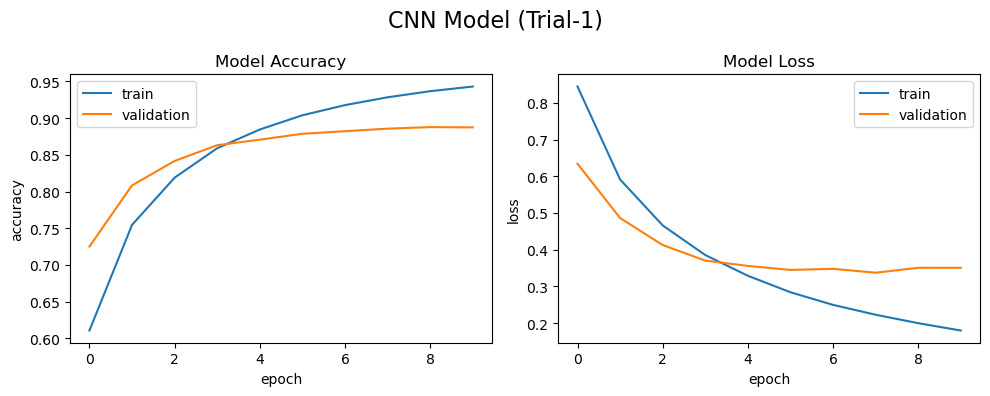

In [36]:
# Plotting hasil pelatihan
plotting_model_measurements(cnn_model_trial1_history,'CNN',1)

In [44]:
cnn_model_trial1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# Menyimpan model format SaveModel
cnn_model_trial1.save('CG/CNN_model_trial1.h5')
print("Model saved successfully!")

Model saved successfully!


In [38]:
# Fungsi untuk memproses teks input
def preprocess_input_text(text):
    text = text_preprocessing_process(text)  # Menggunakan fungsi preprocessing sebelumnya
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_num_of_words)
    return padded_sequence

# Fungsi prediksi sentimen
def predict_sentiment(input_text):
    processed_input = preprocess_input_text(input_text)
    prediction = cnn_model_trial1.predict(processed_input)
    sentiment = np.argmax(prediction, axis=1)[0]  # Mendapatkan kelas prediksi (0, 1, atau 2)
    confidence = prediction[0][sentiment]  # Probabilitas kelas tertinggi
    if sentiment == 0:
        return "bad", confidence
    elif sentiment == 1:
        return "good", confidence
    else:
        return "neutral", confidence

# Contoh input
data_input = "openai announced chatgpt model optimized dialogue"
predicted_sentiment, confidence = predict_sentiment(data_input)

print("Input:", data_input)
print("Predicted Sentiment:", predicted_sentiment)
print("Confidence:", round(confidence * 100, 2), "%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step
Input: openai announced chatgpt model optimized dialogue
Predicted Sentiment: neutral
Confidence: 98.68 %


In [44]:
# Trial-2 (embedding_trainable=False)

cnn_model_trial2 = buat_cnn(embedding_trainable=False, Conv1D_1=True, Conv1D_2=False, Conv1D_3=False, _learning_rate=0.01, model_name='CNN_Trial-2')
cnn_model_trial2_history = cnn_model_trial2.fit(x_train, y_train,epochs=10, verbose=1,batch_size=256,validation_split=0.2)

'''Plotting Model Architecture For Trial-2'''
tf.keras.utils.plot_model(cnn_model_trial2, show_shapes=True)
#to_file=('/content/drive/MyDrive/Python/CNN_Model_Trial_2.png')
#plt.savefig('/content/drive/MyDrive/Python/CNN Model Trial 2.png')

cnn_model_trials_dict['Embedding layer Trainable'][1]='No'

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "CNN_Trial-2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_Layer (Embedding)     │ ?                      │     9,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,600,000 (36.62 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,600,000 (36.62 MB)

Epoch 1/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 210s 363ms/step - accuracy: 0.6037 - f1_m: 0.5222 - loss: 0.8733 - precision_m: 0.7083 - recall_m: 0.4260 - val_accuracy: 0.7293 - val_f1_m: 0.6933 - val_loss: 0.6272 - val_precision_m: 0.8367 - val_recall_m: 0.5922
Epoch 2/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 193s 351ms/step - accuracy: 0.7047 - f1_m: 0.6712 - loss: 0.6817 - precision_m: 0.8055 - recall_m: 0.5760 - val_accuracy: 0.7449 - val_f1_m: 0.7127 - val_loss: 0.5965 - val_precision_m: 0.8518 - val_recall_m: 0.6130
Epoch 3/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 181s 330ms/step - accuracy: 0.7281 - f1_m: 0.7010 - loss: 0.6310 - precision_m: 0.8248 - recall_m: 0.6102 - val_accuracy: 0.7561 - val_f1_m: 0.7309 - val_loss: 0.5772 - val_precision_m: 0.8475 - val_recall_m: 0.6429
Epoch 4/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 183s 333ms/step - accuracy: 0.7465 - f1_m: 0.7221 - loss: 0.6005 - precision_m: 0.8340 - recall_m: 0.6372 - val_accuracy: 0.7597 - val_f1_m: 0.7301 - val_loss: 0.5791 - val_precision_m: 0.8555

In [45]:
# Trial-3 (embedding_trainable=False)

cnn_model_trial3 = buat_cnn(embedding_trainable=False, Conv1D_1=True, Conv1D_2=True, Conv1D_3=True, _learning_rate=0.001, model_name='CNN_Trial-3')
cnn_model_trial3_history = cnn_model_trial3.fit(x_train, y_train,epochs=10, verbose=1,batch_size=256,validation_split=0.2)

'''Plotting Model Architecture For Trial-3'''
#tf.keras.utils.plot_model(cnn_model_trial3, show_shapes=True)
#plt.savefig('/content/drive/MyDrive/Python/CNN Model (Trial 3).png')

cnn_model_trials_dict['Embedding layer Trainable'][2]='No'

Model: "CNN_Trial-3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_Layer (Embedding)     │ ?                      │     9,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,600,000 (36.62 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,600,000 (36.62 MB)

Epoch 1/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 231s 414ms/step - accuracy: 0.6539 - f1_m: 0.5715 - loss: 0.7706 - precision_m: 0.7311 - recall_m: 0.4844 - val_accuracy: 0.7813 - val_f1_m: 0.7758 - val_loss: 0.5196 - val_precision_m: 0.8353 - val_recall_m: 0.7243
Epoch 2/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 216s 393ms/step - accuracy: 0.8184 - f1_m: 0.8120 - loss: 0.4631 - precision_m: 0.8524 - recall_m: 0.7755 - val_accuracy: 0.7894 - val_f1_m: 0.7874 - val_loss: 0.5074 - val_precision_m: 0.8066 - val_recall_m: 0.7692
Epoch 3/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 256s 382ms/step - accuracy: 0.8675 - f1_m: 0.8654 - loss: 0.3462 - precision_m: 0.8810 - recall_m: 0.8503 - val_accuracy: 0.8091 - val_f1_m: 0.8081 - val_loss: 0.4981 - val_precision_m: 0.8234 - val_recall_m: 0.7934
Epoch 4/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 212s 385ms/step - accuracy: 0.9059 - f1_m: 0.9052 - loss: 0.2595 - precision_m: 0.9131 - recall_m: 0.8975 - val_accuracy: 0.8010 - val_f1_m: 0.7991 - val_loss: 0.5463 - val_precision_m: 0.8105

In [46]:
# Trial-4 (embedding_trainable=True) 

cnn_model_trial4 = buat_cnn(embedding_trainable=True, Conv1D_1=True, Conv1D_2=True, Conv1D_3=True, _learning_rate=0.001, model_name='CNN_Trial-4')
cnn_model_trial4_history = cnn_model_trial4.fit(x_train, y_train,epochs=10, verbose=1,batch_size=256,validation_split=0.2)

'''Plotting Model Architecture For Trial-4'''
tf.keras.utils.plot_model(cnn_model_trial4, show_shapes=True)
#plt.savefig('/content/drive/MyDrive/Python/CNN Model (Trial 4).png')

cnn_model_trials_dict['Embedding layer Trainable'][3]='Yes'

Model: "CNN_Trial-4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_Layer (Embedding)     │ ?                      │     9,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,600,000 (36.62 MB)

 Trainable params: 9,600,000 (36.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 358s 627ms/step - accuracy: 0.7147 - f1_m: 0.6464 - loss: 0.6578 - precision_m: 0.7550 - recall_m: 0.5877 - val_accuracy: 0.8902 - val_f1_m: 0.8882 - val_loss: 0.3059 - val_precision_m: 0.9011 - val_recall_m: 0.8757
Epoch 2/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 327s 596ms/step - accuracy: 0.9132 - f1_m: 0.9123 - loss: 0.2615 - precision_m: 0.9194 - recall_m: 0.9054 - val_accuracy: 0.9028 - val_f1_m: 0.9026 - val_loss: 0.2769 - val_precision_m: 0.9084 - val_recall_m: 0.8969
Epoch 3/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 333s 607ms/step - accuracy: 0.9413 - f1_m: 0.9415 - loss: 0.1807 - precision_m: 0.9451 - recall_m: 0.9379 - val_accuracy: 0.9010 - val_f1_m: 0.9012 - val_loss: 0.2971 - val_precision_m: 0.9046 - val_recall_m: 0.8978
Epoch 4/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 351s 640ms/step - accuracy: 0.9600 - f1_m: 0.9599 - loss: 0.1269 - precision_m: 0.9625 - recall_m: 0.9572 - val_accuracy: 0.8959 - val_f1_m: 0.8962 - val_loss: 0.3338 - val_precision_m: 0.9006

In [47]:
# Trial-5 (embedding_trainable=False)

cnn_model_trial5 = buat_cnn(embedding_trainable=False, Conv1D_1=True, Conv1D_2=True, Conv1D_3=True, _learning_rate=0.0001, model_name='CNN_Trial-5')
cnn_model_trial5_history = cnn_model_trial5.fit(x_train, y_train,epochs=10, verbose=1,batch_size=256,validation_split=0.2)

'''Plotting Model Architecture For Trial-5'''
tf.keras.utils.plot_model(cnn_model_trial5, show_shapes=True)
#plt.savefig('/content/drive/MyDrive/Python/CNN Model (Trial 5).png')

cnn_model_trials_dict['Embedding layer Trainable'][4]='No'

Model: "CNN_Trial-5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_Layer (Embedding)     │ ?                      │     9,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,600,000 (36.62 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,600,000 (36.62 MB)

Epoch 1/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 241s 431ms/step - accuracy: 0.5476 - f1_m: 0.3197 - loss: 0.9517 - precision_m: 0.5746 - recall_m: 0.2462 - val_accuracy: 0.7162 - val_f1_m: 0.6835 - val_loss: 0.6596 - val_precision_m: 0.7968 - val_recall_m: 0.5987
Epoch 2/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 242s 441ms/step - accuracy: 0.7329 - f1_m: 0.7038 - loss: 0.6396 - precision_m: 0.8035 - recall_m: 0.6270 - val_accuracy: 0.7738 - val_f1_m: 0.7682 - val_loss: 0.5454 - val_precision_m: 0.8138 - val_recall_m: 0.7277
Epoch 3/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 233s 425ms/step - accuracy: 0.8141 - f1_m: 0.8060 - loss: 0.4772 - precision_m: 0.8458 - recall_m: 0.7700 - val_accuracy: 0.7878 - val_f1_m: 0.7871 - val_loss: 0.5156 - val_precision_m: 0.8119 - val_recall_m: 0.7639
Epoch 4/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 261s 422ms/step - accuracy: 0.8694 - f1_m: 0.8668 - loss: 0.3628 - precision_m: 0.8835 - recall_m: 0.8508 - val_accuracy: 0.7901 - val_f1_m: 0.7895 - val_loss: 0.5346 - val_precision_m: 0.8015

### **Testing Model CNN**

In [ ]:
# Trial-1
training_score = cnn_model_trial1.evaluate(x_train, y_train)
testing_score = cnn_model_trial1.evaluate(x_test, y_test)

print(f'\nTrial 1')
print(f'Training Accuaracy (Trial 1): {round(training_score[1]*100,1)}%')
print(f'Testing Accuaracy (Trial 1): {round(testing_score[1]*100,1)}%')

'''   Save the data of trial 1 in cnn model trials dictionary   '''
cnn_model_trials_dict['Training Accuaracy'][0]=round(training_score[1]*100,1)
cnn_model_trials_dict['Testing Accuaracy'][0]=round(testing_score[1]*100,1)

In [48]:
# Trial-2
training_score = cnn_model_trial2.evaluate(x_train, y_train)
testing_score = cnn_model_trial2.evaluate(x_test, y_test)

print(f'\nTrial 2')
print(f'Training Accuaracy (Trial 2): {round(training_score[1]*100,1)}%')
print(f'Testing Accuaracy (Trial 2): {round(testing_score[1]*100,1)}%')

'''   Save the data of trial 2 in cnn model trials dictionary   '''
cnn_model_trials_dict['Training Accuaracy'][1]=round(training_score[1]*100,1)
cnn_model_trials_dict['Testing Accuaracy'][1]=round(testing_score[1]*100,1)
cnn_model_trials_dict['Loss'][1] = round(testing_score[0], 2)

5483/5483 ━━━━━━━━━━━━━━━━━━━━ 106s 19ms/step - accuracy: 0.8432 - f1_m: 0.8221 - loss: 0.4144 - precision_m: 0.9023 - recall_m: 0.7571
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.7819 - f1_m: 0.7614 - loss: 0.5342 - precision_m: 0.8475 - recall_m: 0.6933

Trial 2
Training Accuaracy (Trial 2): 83.3%
Testing Accuaracy (Trial 2): 78.0%


In [49]:
# Trial-3
training_score = cnn_model_trial3.evaluate(x_train, y_train)
testing_score = cnn_model_trial3.evaluate(x_test, y_test)

print(f'\nTrial 3')
print(f'Training Accuaracy (Trial 3): {round(training_score[1]*100,1)}%')
print(f'Testing Accuaracy (Trial 3): {round(testing_score[1]*100,1)}%')

'''   Save the data of trial 3 in cnn model trials dictionary   '''
cnn_model_trials_dict['Training Accuaracy'][2]=round(training_score[1]*100,1)
cnn_model_trials_dict['Testing Accuaracy'][2]=round(testing_score[1]*100,1)
cnn_model_trials_dict['Loss'][2] = round(testing_score[0], 2)

5483/5483 ━━━━━━━━━━━━━━━━━━━━ 127s 23ms/step - accuracy: 0.9785 - f1_m: 0.9785 - loss: 0.0739 - precision_m: 0.9796 - recall_m: 0.9775
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - accuracy: 0.7980 - f1_m: 0.7980 - loss: 0.9188 - precision_m: 0.8012 - recall_m: 0.7949

Trial 3
Training Accuaracy (Trial 3): 94.6%
Testing Accuaracy (Trial 3): 79.8%


In [50]:
# Trial-4
training_score = cnn_model_trial4.evaluate(x_train, y_train)
testing_score = cnn_model_trial4.evaluate(x_test, y_test)

print(f'\nTrial 4')
print(f'Training Accuaracy (Trial 4): {round(training_score[1]*100,1)}%')
print(f'Testing Accuaracy (Trial 4): {round(testing_score[1]*100,1)}%')

'''   Save the data of trial 4 in cnn model trials dictionary   '''
cnn_model_trials_dict['Training Accuaracy'][3]=round(training_score[1]*100,1)
cnn_model_trials_dict['Testing Accuaracy'][3]=round(testing_score[1]*100,1)
cnn_model_trials_dict['Loss'][3] = round(testing_score[0], 2)

5483/5483 ━━━━━━━━━━━━━━━━━━━━ 122s 22ms/step - accuracy: 0.9927 - f1_m: 0.9926 - loss: 0.0319 - precision_m: 0.9929 - recall_m: 0.9924
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.8965 - f1_m: 0.8969 - loss: 0.6385 - precision_m: 0.8979 - recall_m: 0.8960

Trial 4
Training Accuaracy (Trial 4): 97.5%
Testing Accuaracy (Trial 4): 89.5%


In [51]:
# Trial-5
training_score = cnn_model_trial5.evaluate(x_train, y_train)
testing_score = cnn_model_trial5.evaluate(x_test, y_test)

print(f'\nTrial 5')
print(f'Training Accuaracy (Trial 5): {round(training_score[1]*100,1)}%')
print(f'Testing Accuaracy (Trial 5): {round(testing_score[1]*100,1)}%\n\n')

'''   Save the data of trial 5 in cnn model trials dictionary   '''
cnn_model_trials_dict['Training Accuaracy'][4]=round(training_score[1]*100,1)
cnn_model_trials_dict['Testing Accuaracy'][4]=round(testing_score[1]*100,1)
cnn_model_trials_dict['Loss'][4] = round(testing_score[0], 2)

5483/5483 ━━━━━━━━━━━━━━━━━━━━ 136s 25ms/step - accuracy: 0.9761 - f1_m: 0.9761 - loss: 0.0922 - precision_m: 0.9764 - recall_m: 0.9758
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.7859 - f1_m: 0.7860 - loss: 0.8996 - precision_m: 0.7869 - recall_m: 0.7852

Trial 5
Training Accuaracy (Trial 5): 94.1%
Testing Accuaracy (Trial 5): 78.6%




In [52]:
# Membuat DataFrame hasil evaluasi
cnn_model_trials_df = pd.DataFrame(cnn_model_trials_dict)

# Tampilkan DataFrame
print(cnn_model_trials_df)

  Measurement  Training Accuaracy  Testing Accuaracy  Loss  \
0     Trial-1                95.4               88.6  0.36   
1     Trial-2                83.3               78.0  0.54   
2     Trial-3                94.6               79.8  0.93   
3     Trial-4                97.5               89.5  0.65   
4     Trial-5                94.1               78.6  0.90   

  Embedding layer Trainable  
0                       Yes  
1                        No  
2                        No  
3                       Yes  
4                        No  


# **Plotting accrurasi dan loss**

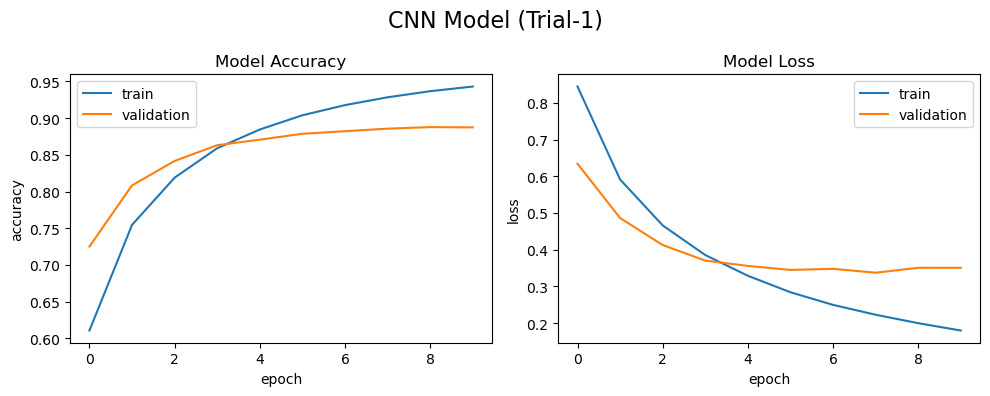

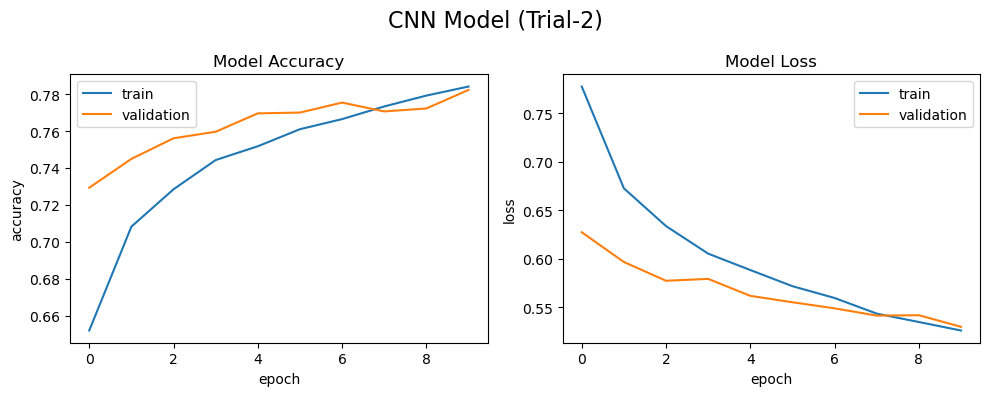

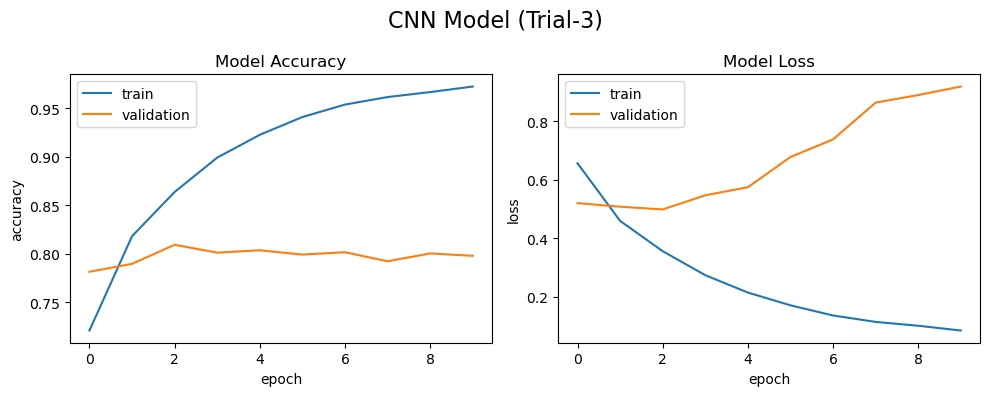

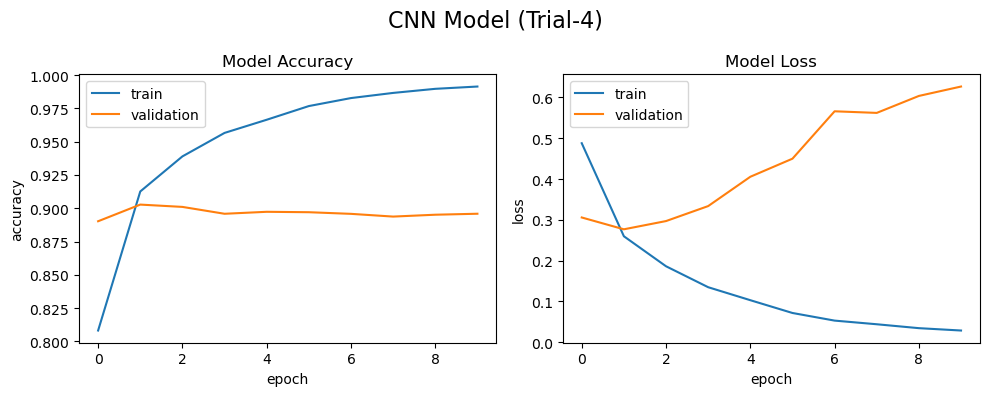

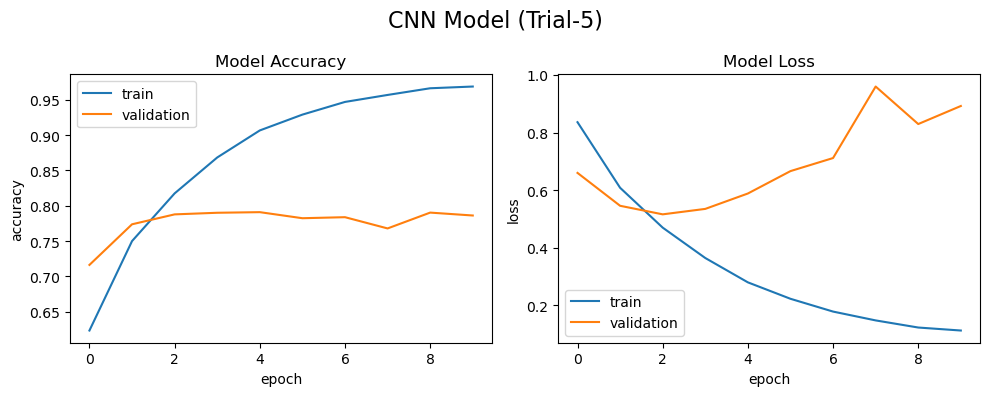

In [53]:
"""## **Plotting The Accuracy and Loss For each Trial**"""

plotting_model_measurements(cnn_model_trial1_history,'CNN',1)

plotting_model_measurements(cnn_model_trial2_history,'CNN',2)

plotting_model_measurements(cnn_model_trial3_history,'CNN',3)

plotting_model_measurements(cnn_model_trial4_history,'CNN',4)

plotting_model_measurements(cnn_model_trial5_history,'CNN',5)

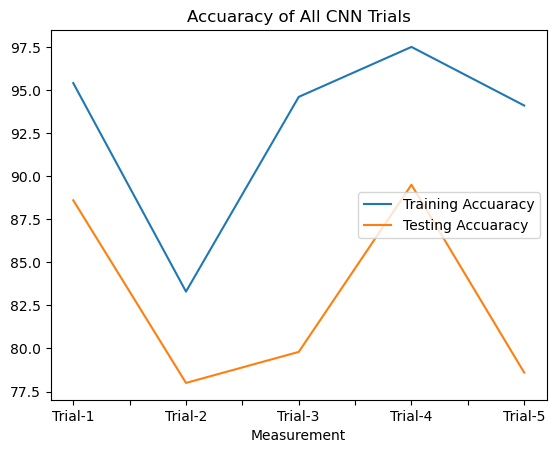

In [54]:
"""## **Plotting The Accuracies For all Trials**"""

cnn_model_trials_df[['Measurement','Training Accuaracy','Testing Accuaracy']].plot(x='Measurement', title = 'Accuaracy of All CNN Trials');
plt.savefig('Images/CNN Model (All Trials Accuracies).png')

In [55]:
#cnn_model_trial1.export('CG/CNN_model_trial1')
cnn_model_trial2.save('CNN_model_trial2.h5')
cnn_model_trial3.save('CNN_model_trial3.h5')
cnn_model_trial4.save('CNN_model_trial4.h5')
cnn_model_trial5.save('CNN_model_trial5.h5')

#**Prediksi**

In [56]:
# Fungsi untuk memproses teks input
def preprocess_input_text(text):
    text = text_preprocessing_process(text)  # Menggunakan fungsi preprocessing sebelumnya
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_num_of_words)
    return padded_sequence

# Fungsi prediksi sentimen
def predict_sentiment(input_text):
    processed_input = preprocess_input_text(input_text)
    prediction = cnn_model_trial2.predict(processed_input)
    sentiment = np.argmax(prediction, axis=1)[0]  # Mendapatkan kelas prediksi (0, 1, atau 2)
    confidence = prediction[0][sentiment]  # Probabilitas kelas tertinggi
    if sentiment == 0:
        return "bad", confidence
    elif sentiment == 1:
        return "good", confidence
    else:
        return "neutral", confidence

# Contoh input
data_input = "openai announced chatgpt model optimized dialogue"
predicted_sentiment, confidence = predict_sentiment(data_input)

print("Input:", data_input)
print("Predicted Sentiment:", predicted_sentiment)
print("Confidence:", round(confidence * 100, 2), "%")


Original text: openai announced chatgpt model optimized dialogue
Processed text: openai announced chatgpt model optimized dialogue
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
Input: openai announced chatgpt model optimized dialogue
Predicted Sentiment: neutral
Confidence: 86.97 %


In [57]:
# Fungsi untuk memproses teks input
def preprocess_input_text(text):
    text = text_preprocessing_process(text)  # Menggunakan fungsi preprocessing sebelumnya
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_num_of_words)
    return padded_sequence

# Fungsi prediksi sentimen
def predict_sentiment(input_text):
    processed_input = preprocess_input_text(input_text)
    prediction = cnn_model_trial3.predict(processed_input)
    sentiment = np.argmax(prediction, axis=1)[0]  # Mendapatkan kelas prediksi (0, 1, atau 2)
    confidence = prediction[0][sentiment]  # Probabilitas kelas tertinggi
    if sentiment == 0:
        return "bad", confidence
    elif sentiment == 1:
        return "good", confidence
    else:
        return "neutral", confidence

# Contoh input
data_input = "openai announced chatgpt model optimized dialogue"
predicted_sentiment, confidence = predict_sentiment(data_input)

print("Input:", data_input)
print("Predicted Sentiment:", predicted_sentiment)
print("Confidence:", round(confidence * 100, 2), "%")


Original text: openai announced chatgpt model optimized dialogue
Processed text: openai announced chatgpt model optimized dialogue
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
Input: openai announced chatgpt model optimized dialogue
Predicted Sentiment: neutral
Confidence: 96.57 %


In [58]:
# Fungsi untuk memproses teks input
def preprocess_input_text(text):
    text = text_preprocessing_process(text)  # Menggunakan fungsi preprocessing sebelumnya
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_num_of_words)
    return padded_sequence

# Fungsi prediksi sentimen
def predict_sentiment(input_text):
    processed_input = preprocess_input_text(input_text)
    prediction = cnn_model_trial4.predict(processed_input)
    sentiment = np.argmax(prediction, axis=1)[0]  # Mendapatkan kelas prediksi (0, 1, atau 2)
    confidence = prediction[0][sentiment]  # Probabilitas kelas tertinggi
    if sentiment == 0:
        return "bad", confidence
    elif sentiment == 1:
        return "good", confidence
    else:
        return "neutral", confidence

# Contoh input
data_input = "openai announced chatgpt model optimized dialogue"
predicted_sentiment, confidence = predict_sentiment(data_input)

print("Input:", data_input)
print("Predicted Sentiment:", predicted_sentiment)
print("Confidence:", round(confidence * 100, 2), "%")


Original text: openai announced chatgpt model optimized dialogue
Processed text: openai announced chatgpt model optimized dialogue
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
Input: openai announced chatgpt model optimized dialogue
Predicted Sentiment: neutral
Confidence: 99.99 %


In [59]:
# Fungsi untuk memproses teks input
def preprocess_input_text(text):
    text = text_preprocessing_process(text)  # Menggunakan fungsi preprocessing sebelumnya
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_num_of_words)
    return padded_sequence

# Fungsi prediksi sentimen
def predict_sentiment(input_text):
    processed_input = preprocess_input_text(input_text)
    prediction = cnn_model_trial5.predict(processed_input)
    sentiment = np.argmax(prediction, axis=1)[0]  # Mendapatkan kelas prediksi (0, 1, atau 2)
    confidence = prediction[0][sentiment]  # Probabilitas kelas tertinggi
    if sentiment == 0:
        return "bad", confidence
    elif sentiment == 1:
        return "good", confidence
    else:
        return "neutral", confidence

# Contoh input
data_input = "openai announced chatgpt model optimized dialogue"
predicted_sentiment, confidence = predict_sentiment(data_input)

print("Input:", data_input)
print("Predicted Sentiment:", predicted_sentiment)
print("Confidence:", round(confidence * 100, 2), "%")


Original text: openai announced chatgpt model optimized dialogue
Processed text: openai announced chatgpt model optimized dialogue


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
Input: openai announced chatgpt model optimized dialogue
Predicted Sentiment: neutral
Confidence: 97.69 %
